# 워드 클라우드
- 한빛출판네크워크 > 새로나온책(200권) > TAG
- TAG를 워드클라우드로 만들기

#### 1. 크롤링

In [1]:
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [2]:
page = 1
site = 'https://www.hanbit.co.kr'
url = site + f'/store/books/new_book_list.html?page={page}&brand=&cate1=&cate2=&searchKey=&keyWord='
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [3]:
lis = soup.select('.sub_book_list')
len(lis)

20

In [5]:
li = lis[0]
li.select_one('.book_tit').get_text().strip()

'엑셀이 편해지는 파이썬'

In [6]:
href = li.select_one('.book_tit').find('a')['href']
href

'/store/books/look.php?p_code=B2831223974'

In [8]:
res = requests.get(site + href)
book_soup = BeautifulSoup(res.text, 'html.parser')

In [9]:
# Tag
tags = book_soup.select('.tag_area > a')
len(tags)

14

In [73]:
tag_list = []
for a in tags:
    tag_list.append(a.get_text().strip())
print(tag_list)

['데이터', '스토리텔링', '시각화', '차트', '슬라이드', '발표', '제안', '기획서', '제안서', '보고서', 'PT', '공모전', 'PPT', 'pptx', '프레젠테이션', '파워포인트']


In [74]:
lines = []
base_url = 'https://www.hanbit.co.kr'
sub_url = '/store/books/new_book_list.html'
for page in tqdm(range(1, 11)):     # page
    url = f'{base_url}{sub_url}?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select('.sub_book_list')

    for li in lis:      # main list
        book_url = li.find('a')['href']
        res = requests.get(f'{base_url}{book_url}')
        book_soup = BeautifulSoup(res.text, 'html.parser')
        tags = book_soup.select('.tag_area > a')
        for a in tags:
            tag_list.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [75]:
tag_list[:20]

['데이터',
 '스토리텔링',
 '시각화',
 '차트',
 '슬라이드',
 '발표',
 '제안',
 '기획서',
 '제안서',
 '보고서',
 'PT',
 '공모전',
 'PPT',
 'pptx',
 '프레젠테이션',
 '파워포인트',
 '파이썬',
 '엑셀',
 'VBA',
 '셀수식']

In [76]:
len(tag_list)

2446

- tag_list를 frequency dictionary로 만들기

In [77]:
tag_set = set(tag_list)
len(tag_set)

1510

In [78]:
tag_dict = {item:tag_list.count(item) for item in tag_set}

In [79]:
count = 0
for key, val in tag_dict.items():
    print(key, ':', val)
    count += 1
    if count > 5:
        break

 : 1
AWS AppSync : 1
AI : 14
DDoS : 1
아마존 웹 서비스 : 1
한글공부 : 8


#### 2. 워드 클라우드 그리기

- 워드 클라우드 그리기

In [80]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams.update({'text.color': "gray",
                    'axes.labelcolor': "white",
                    'xtick.color': "white",
                    'ytick.color': "white"
                    })

In [81]:
wc = WordCloud(background_color='white',
                random_state=2022, font_path='C:/Windows/Fonts/malgun.ttf')
wc = wc.generate_from_frequencies(tag_dict)

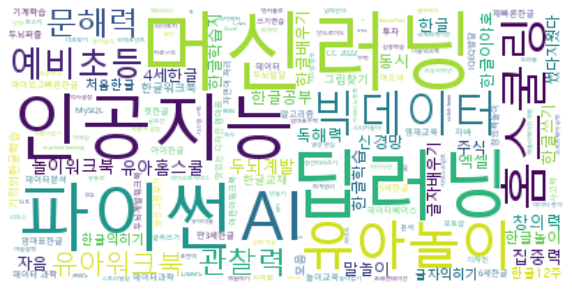

In [82]:
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 단어를 펼쳐서 워드 클라우드 만들기

In [83]:
tag_text = ' '.join(tag_list)

In [84]:
wc = WordCloud(background_color='white',
                random_state=2022, max_words=500,
                font_path='C:/Windows/Fonts/malgun.ttf')
wc = wc.generate(tag_text)

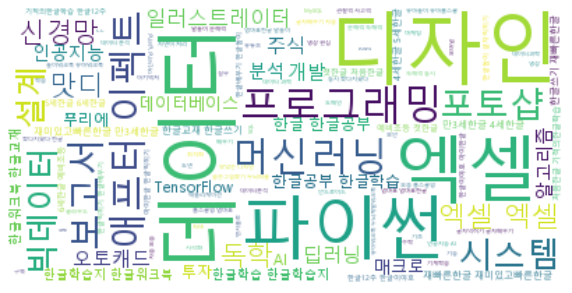

In [85]:
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()